<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/CyruRuleU6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


Hi! I found an interesting dataset about student performance , and I'd like to see if I can predict a student's grades based on a bunch of auxilliary factors. How well this works has a bunch of interesting implications about how much a student's performance is really in their control, so I'm curious to see how this goes.

In [2]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import bambi as bmb
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00


The Dataset

In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


In [4]:

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframe)
sp_data = pd.concat([student_performance.data.features,student_performance.data.targets],axis = 1) # student performance data, i the predictors and predictees are in two different datasets so i had to combine them

And let's increase the maximum number of columns in a table so we can see the whole set

In [5]:
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [6]:
sp_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Here's what I think the 8 most important variables out of this data are for trying to predict grade.

Time Spent Studying:

Without additional context, spending more time studying for a class will cause one's performance in a class to improve. Spending more time studying will increase your comprehension of the material, which directly leads to better grades

Attendance:

Higher attendance means students have to spend less time making up in class assignments, are present for more in class lectures or activities that enrich understanding. This directly causes an increase in grades

Desire to Go to Higher Education:

Students with an interest in pursuing higher education will have an interest in keeping good grades that students may not. I think that this factor will increase grades directly because of higher student engagement in class and atentiveness as well as by increasing study time.

Level of Mother’s Education:

How educated a student's parents are (specifically the mother in this case) can reveal both the socioeconomic status of the student's family and how much emphasis the family puts on education. A child with very educated parents is more likely to be able to get help from their parents on school work or to clarify concepts. Additionally, such a student is also more likely to have the resources to get a tutor if they need one and the freedom from financial burden to have the time to study.

Relationship with Family (Emotional Support Factor):

I am positing that a supportive and healthy family/home life would have a positive impact on academic performance both for time reasons (better home life -> more available time) and focus reasons.

Alcohol Consumption on Weekdays (Lifestyle Impact):

If a student is drinking, especially during the work week, this will definitely decrease their ability to focus in class and perform well on exams, decreasing their grades.

Reason for Attending School (Motivational/Contextual Factor):

Why a student is attending this particular school provides some insight into how commited they are which directly affects their academic performance. A student who attends a school because it is "the best" is likely more commited to doing well in their classes than a student who chose the school mainly because it was close to them.

Internet Access (Resource Availability):

If a student has internet access, that allows them access to online support to ask questions and get help with homework, online study tools, the ability to do research online without traveling, and more. In general having internet access makes being a good student dramatically easier, which would usually increase academic performance.


now lets isolate just these variables to see a little clearer. Also, important clarification, I will be using just the final grades as my predicted, not semester grades.

In [7]:
important_variables = [
    'studytime',  # Time Spent Studying
    'absences',  # number of absences (attendance)
    'higher',  # Desire to Go to Higher Education
    'Medu',  # Level of Mother’s Education
    'famrel',  # Relationship with Family
    'Dalc',  # Alcohol Consumption on Weekdays
    'reason',  # Reason for attending school
    'internet',  # Internet Access
    'G3'  # Final Grades
]


sp_data = sp_data[important_variables]

In [8]:
sp_data

,studytime,absences,higher,Medu,famrel,Dalc,reason,internet,G3
0,2,4,yes,4,4,1,course,no,11
1,2,2,yes,1,5,1,course,yes,11
2,2,6,yes,1,4,2,other,yes,12
3,3,0,yes,4,3,1,home,yes,14
4,2,0,yes,3,4,1,home,no,13
...,...,...,...,...,...,...,...,...,...
644,3,4,yes,2,5,1,course,yes,10
645,2,4,yes,3,4,1,course,yes,16
646,2,6,yes,1,1,1,course,no,9
647,1,6,yes,3,2,3,course,yes,10


Before I continue I should clarify how all of these columns are measured

studytime is a numeric variable measuring weekly study time, according to the following rules 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours

absences is the number of absences the student had that year

higher is categorical, yes means the student wants to puruse higher education, no means they do not

Medu is a numeric variable measuring the student's mother's education level, 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education

famrel is a numeric variable representing the quality of the student's relationships with family, with 1 being "very bad" and 5 being "excellent"

Dalc is a numeric variable representing workday alcohol consumption from 1 - very low to 5 - very high

reason is a categorical variable representing the reason the student is going to this schoo,the categories are close to 'home', school 'reputation', 'course' preference or 'other' (the words in quotes are the names of the categories)

internet is categorical and represents whether the student has internet access, yes = yes and no = no


Now it's time to actually think about how we might want to put all of these together. I don' think any type of heirarchy is a good idea here because it isn't like any of my categories result in students taking a fundamentally different approach to their courses. I wouldn't think that whether or not a student wants to pursure higher education impacts the effect that studying more has on their grades. All of these students are going to the same school and taking the same relevant classes. No category makes a meaningful enough difference in the effects of the other variables to warrant a heirarchy.

I believe the exception to this is internet access, because it represents something about the student's capacity to study and prepare rather than their motivations. If a student can not get educational help from their family (for instance because their family doesn't have the education to help) then access to the internet is paramount to *allowing* the student to still study and perform in a way that it wouldn't be otherwise. In other words, I think that internet access and mother's education both affect some hidden notion of "access to educational resources." I think this should be captured through an interaction rather than a heirarchy though.

Other than this, I think that the effects of the predictors are mostly seperate, so Ill leave out other interaction terms.

I've established that I think all of these variables are important, so let's start by considering all of them and see about the interaction terms.

As I've said, I only think one interaction term makes sense, so let's start with just that.

In [9]:
model_1 = bmb.Model("G3 ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet", data=sp_data)
model_2 = bmb.Model("G3 ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet + Medu:internet", data=sp_data)

In [20]:
idata_1 = model_1.fit(idata_kwargs={"log_likelihood":True})
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

In [21]:
model_dict = {
    "model_1": idata_1,
    "model_2": idata_2,
}

comparison_result = az.compare(model_dict, ic="loo")

In [22]:
az.compare( {"model_1":idata_1,"model_2":idata_2} )

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_1,0,-1615.894462,14.705176,0.000000,0.818821,30.730637,0.000000,False,log
model_2,1,-1616.334617,15.784317,0.440154,0.181179,30.956670,1.180119,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

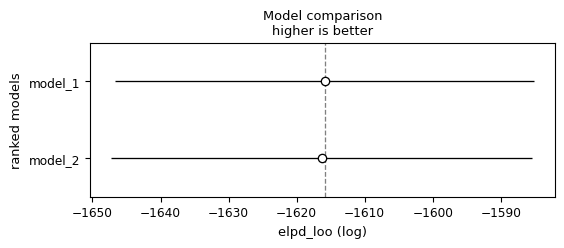

In [23]:
az.plot_compare(comparison_result)

Interesting, it seems like I was totally wrong about the interaction term, it seemed to make things worse.

Now lets look at some more informative visualizations of the better model to see what's happening and where we can improve.

In [24]:
posterior_predictive = model_1.predict(idata_1, kind="pps", inplace=False)

/usr/local/lib/python3.11/dist-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


<Axes: xlabel='G3'>

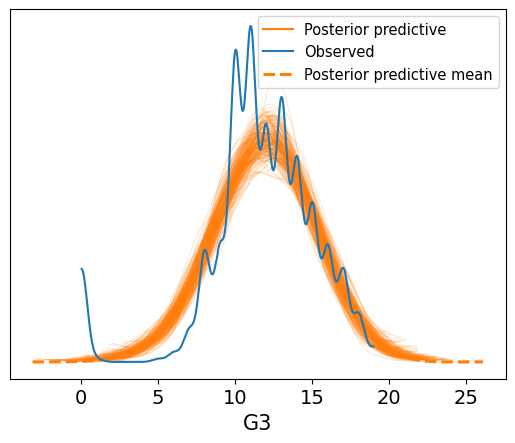

In [26]:
az.plot_ppc(posterior_predictive, num_pp_samples=200, colors=["C1", "C0", "C1"])

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


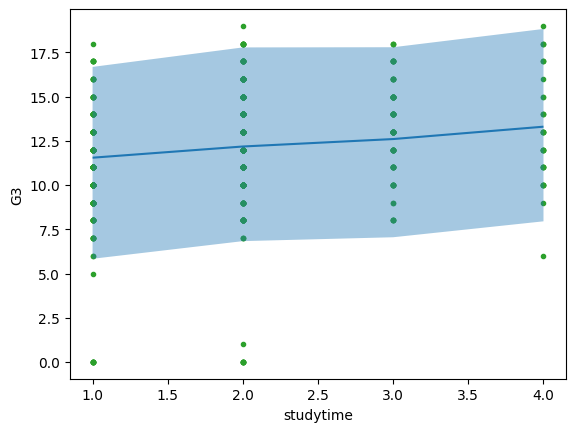

In [27]:
bmb.interpret.plot_predictions(model_1, idata_1, "studytime", pps = True)
plt.plot(sp_data.studytime, sp_data.G3, "C2.", zorder=-3)


Ok so I'm kind of ashamed that this is the first time I'm actually plotting any of my data, so before I go further, I'll make a histogram of the grades.

<Axes: >

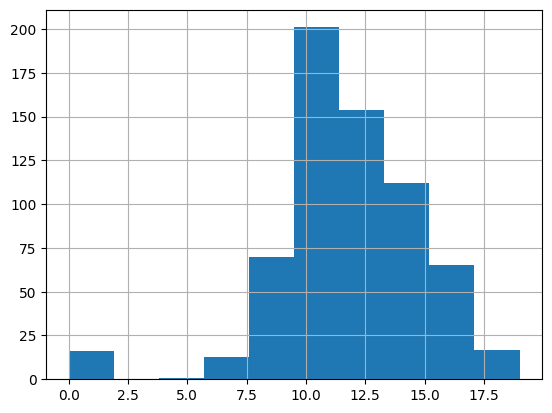

In [28]:
sp_data.G3.hist()

Ok, so the data is relatively normal with a rightward skew, and then it has a bunch of outliers with grades of 0. I really do not understand why those grades are 0. It is some element of the data I do not understand, so I have no hope of some how training a model to predict it. In light of this, I'm going to chop out these 0 points and run my models again.

Something I notice from my preliminary analysis of model 1 is that it seems to underpredict the lower end of the bell curve because it is currently too normalized. It doesn't have the same skew as the original data. We can also note from the plot in [44] that there is a slight positive correlation between study time and grades which is what I expected. Now, to clean the data and try run everything again

In [29]:
sp_data = sp_data[sp_data.G3 != 0]

<Axes: >

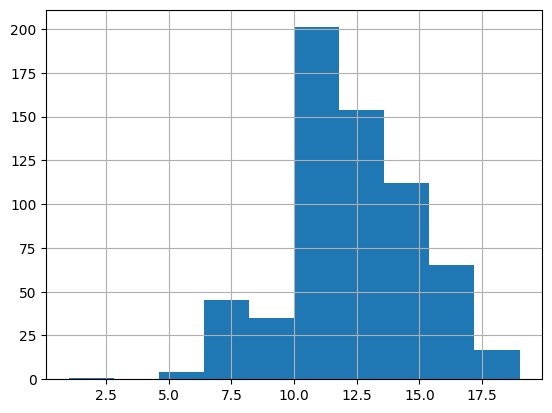

In [30]:
sp_data.G3.hist()

much better

now to run models with the same parameters as before

In [31]:
model_1 = bmb.Model("G3 ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet", data=sp_data)
model_2 = bmb.Model("G3 ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet + Medu:internet", data=sp_data)

In [32]:
idata_1 = model_1.fit(idata_kwargs={"log_likelihood":True})
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

In [33]:
model_dict = {
    "model_1": idata_1,
    "model_2": idata_2,
}

comparison_result = az.compare(model_dict, ic="loo")

In [34]:
az.compare( {"model_1":idata_1,"model_2":idata_2} )

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_2,0,-1448.399542,13.126197,0.000000,0.764828,19.221176,0.00000,False,log
model_1,1,-1449.446707,12.050543,1.047165,0.235172,19.150217,2.00073,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

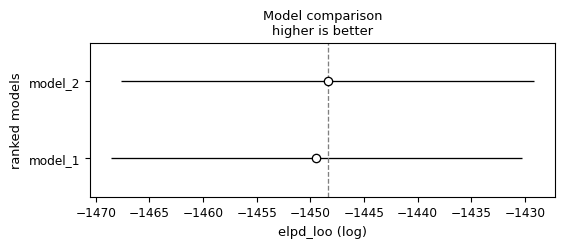

In [35]:
az.plot_compare(comparison_result)

Interesting! Without those 0s, model 2, the one with the interaction term seems to do better. Let's plot it now

In [36]:
posterior_predictive = model_2.predict(idata_2, kind="pps", inplace=False)

/usr/local/lib/python3.11/dist-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


<Axes: xlabel='G3'>

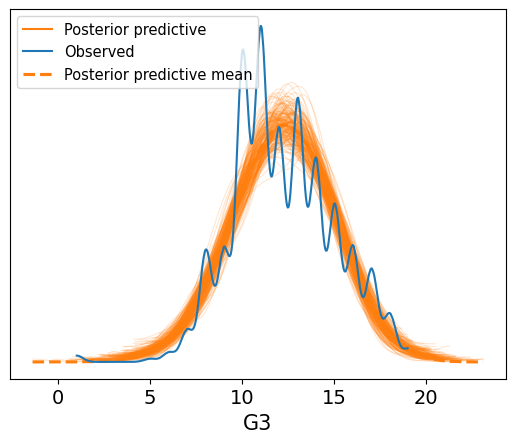

In [37]:
az.plot_ppc(posterior_predictive, num_pp_samples=200, colors=["C1", "C0", "C1"])

The spike at 0 in the observed data is gone as we might expect, but the skew of our model is still wrong.

The Average, or what would be considered a mid-level grade is far closer to the maximum (20) than the minimum, so the students with below average grades are less spread than those with above average grades. I don't really understand whay this would be the case. If anything, I would think the data would skew in the other direction with the low values spreading more. Because I don't understand why this skew exists, I don't feel comfortable changing my likelihood to accomodate it, especially since my model is already decent and my data is admittedly lumpy.

I have noticed another feature of the data that I haven't been accounting for. All grades fall within the range [0,20], so I think it may make sense to use a scaled version of a beta distribution from here on. Let's try this.

In [46]:
sp_data['G3_scaled'] = (sp_data.G3 / 20) #normalize G3  to range from 0 to 1

<ipython-input-46-48bdbecdaab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data['G3_scaled'] = (sp_data.G3 / 20) #normalize G3  to range from 0 to 1


In [47]:
model_1 = bmb.Model("G3_scaled ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet", data=sp_data, family="beta") # same models but now with beta likelihoods
model_2 = bmb.Model("G3_scaled ~ studytime + absences + higher + Medu + famrel + Dalc + reason + internet + Medu:internet", data=sp_data, family="beta")

In [48]:
idata_1 = model_1.fit(idata_kwargs={"log_likelihood":True})
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:17

In [49]:
model_dict = {
    "model_1": idata_1,
    "model_2": idata_2,
}

comparison_result = az.compare(model_dict, ic="loo")

In [50]:
az.compare( model_dict )

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_2,0,435.142914,14.048168,0.000000,0.806473,21.423549,0.000000,False,log
model_1,1,433.810003,12.990762,1.332911,0.193527,21.376909,2.091648,False,log


model_2 remains the better one

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

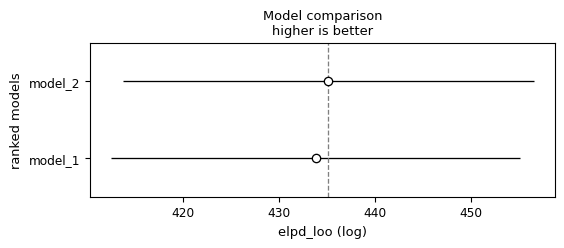

In [51]:
az.plot_compare(comparison_result)

In [59]:
posterior_predictive = model_2.predict(idata_2, kind="pps", inplace=False)

/usr/local/lib/python3.11/dist-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


<Axes: xlabel='G3_scaled'>

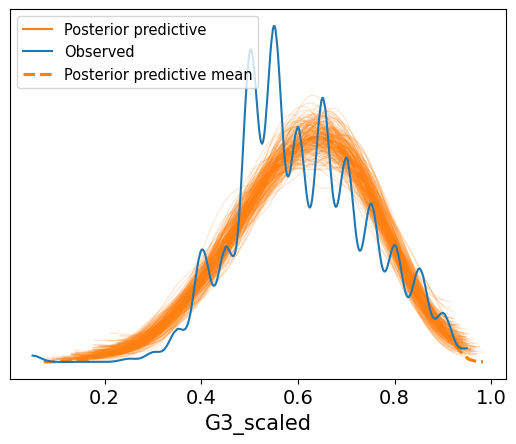

In [60]:
az.plot_ppc(posterior_predictive, num_pp_samples=200, colors=["C1", "C0", "C1"])

I think that this new likelihood changed things for the better, and I would like to use it moving forward. We no longer have grades higher than 20 or lower than 0 predicted, and the curve matches the actual trends of the data prettty well albeit not very smoothly. I tried to find a way to directly compare the predictions of the beta model and the normal model by scaling the posterior predictive back up, but it didn't work.

While I believe all of the variables I currently have are important, next I want to try excluding them one by one so I can see if any of them are actually clouding my predictions. Let's do that.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


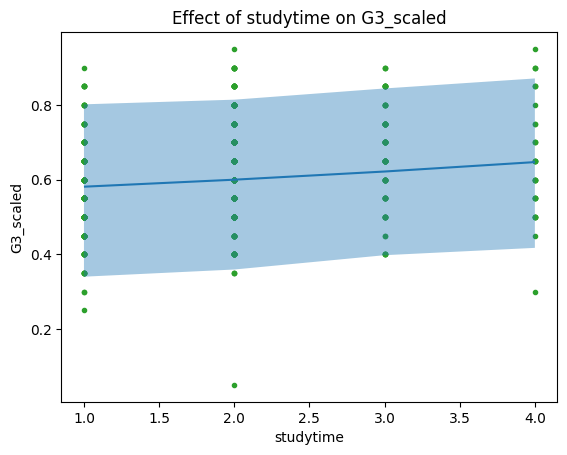

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


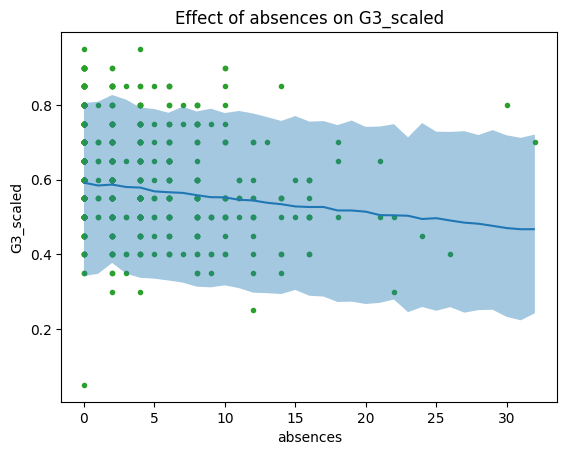

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


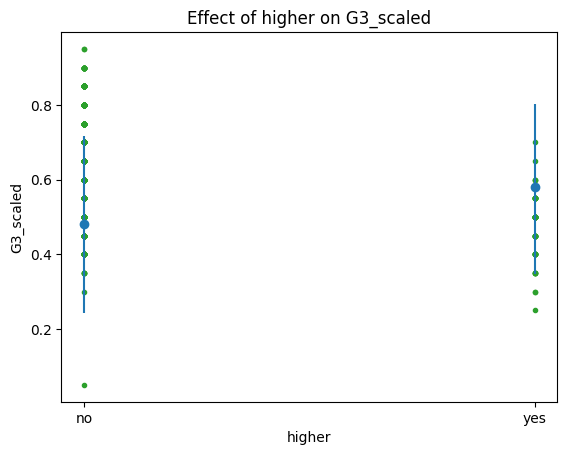

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


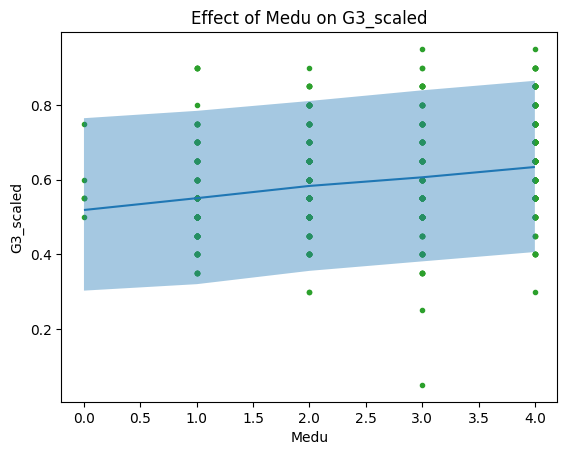

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


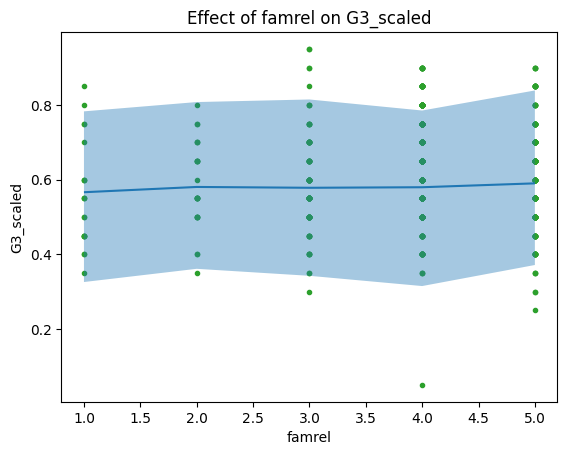

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


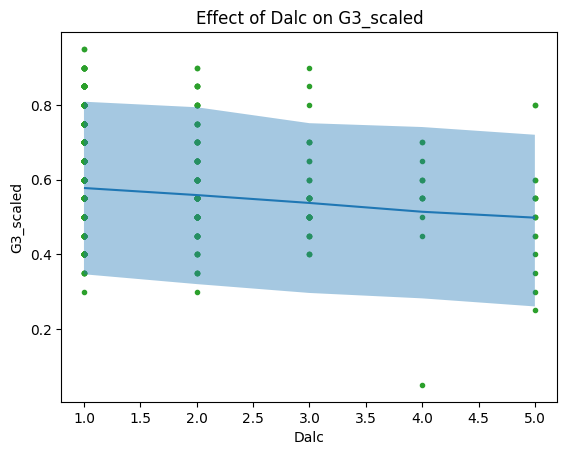

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


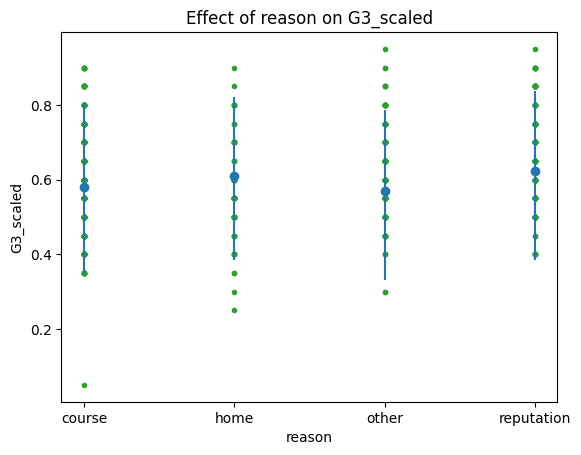

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


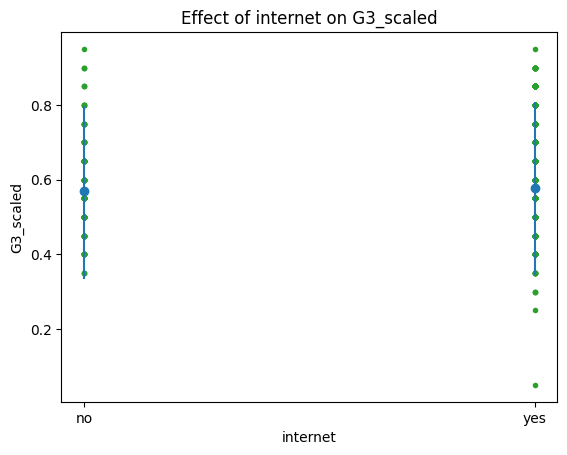

Output()

Output()

In [65]:

predictors = ["studytime", "absences", "higher", "Medu", "famrel", "Dalc", "reason", "internet"]
excluded_models = {}

for predictor in predictors:
    bmb.interpret.plot_predictions(model_2, idata_2, predictor, pps=True)
    plt.plot(sp_data[predictor], sp_data["G3_scaled"], "C2.", zorder=-3)
    plt.title(f"Effect of {predictor} on G3_scaled") # plot each predictor against grades
    plt.show()

    formula = "G3_scaled ~ " + " + ".join([p for p in predictors if p != predictor])

    model_excluded = bmb.Model(formula, data=sp_data, family="beta")
    idata_excluded = model_excluded.fit(idata_kwargs={"log_likelihood": True}) # model without that predictor
    excluded_models[predictor] = idata_excluded

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

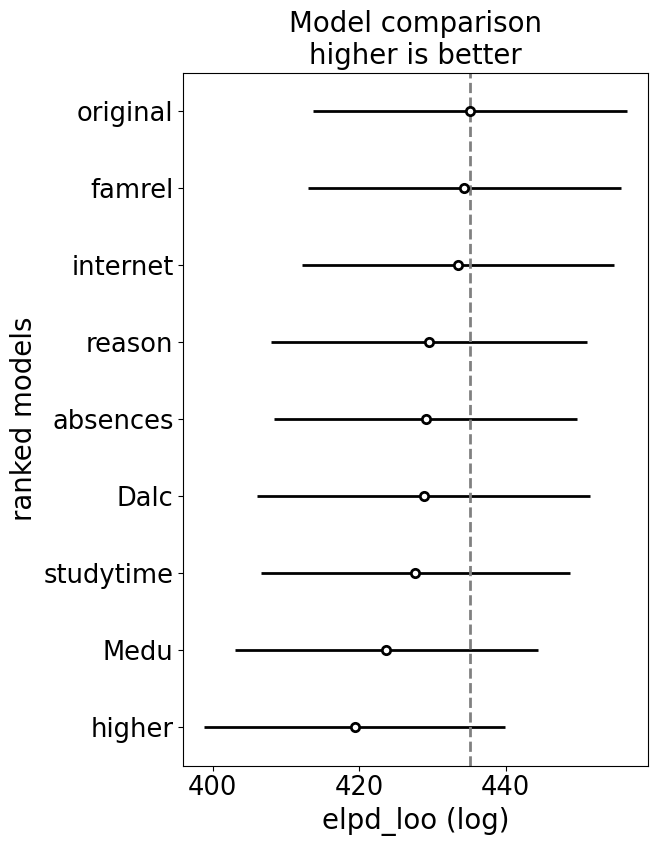

In [71]:
excluded_models["original"] = idata_2
comparison_result = az.compare(excluded_models, ic="loo")
az.plot_compare(comparison_result)

In [72]:
az.compare(excluded_models)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
original,0,435.142914,14.048168,0.000000,5.439917e-01,21.423549,0.000000,False,log
famrel,1,434.350547,12.112721,0.792367,0.000000e+00,21.370304,2.341605,False,log
internet,2,433.533872,12.667242,1.609042,0.000000e+00,21.288326,2.436173,False,log
reason,3,429.512240,10.058174,5.630675,1.299404e-01,21.564788,4.401342,False,log
absences,4,429.085544,11.733552,6.057371,1.398530e-01,20.641811,4.384671,False,log
Dalc,5,428.806223,11.611166,6.336691,1.609985e-01,22.679844,4.613513,False,log
studytime,6,427.667721,12.132087,7.475193,2.521654e-02,21.125775,4.382903,False,log
Medu,7,423.725141,11.757278,11.417773,0.000000e+00,20.617063,5.225966,False,log
higher,8,419.385820,12.520142,15.757094,6.445955e-13,20.502676,4.907735,False,log


Ok, so what we learned is that some of these predictors are less important than others, and some of thme (family relationship and internet access) are almost useless, which really surprises me. In the end though, removing any one of them only makes the model worse, and as such the original model with all of them is best. I still don't think any more interaction terms make sense, so I think this model is done! I do think it's interesting that in comparing the models without each predictor, we essentially get a ranking of those predictors in terms of uselfulness. Furthermore, that ranking qualitatively matches the predictors that seems to have the highest correlation with grades based on our 2d plots. I am thuroughly surprised that internet access is not actually that relevant, but I have a theory as to why. I think that variable may actually represent whether or not their parents allow them to access the internet in their free time / for non-school purposes, not whether or not there is internet access at home. In that case, it makes sense that it wouldn't matter all that much to grades. The only effect would be that without internet access they might not be as distracted from school.


I am also surprised that familial relationships are not that important, and I don't believe that one's relationship with their family is truly unimportant to their school performance. I just think that the relationship that does exist isn't properly accounted for in the 1-5 quantitative measure that my dataset provides.

In general, the best predictors of a student's grades are their desire for higher education, the education level of their parents, and how much they study. This was definitely an imperfect analysis of the subject and my data, but I do think we got some decent insights from it.